In [665]:
import math
import numpy as np

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_context("paper", font_scale=1.2)
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [666]:
# data = []
# for i in range(360, 0, -5):
#     data.append([i, -90, 0])
#
# df_real = pd.DataFrame(data, columns=['correct_roll', 'correct_pitch', 'correct_yaw'])
# df_real['correct_roll'] = df_real['correct_roll'].apply(lambda x: x % 360)
# df_real.to_csv("../test_images/perfect_5degstep/real_scores.csv")

In [667]:
three_d_points = np.array([
    [-0.08, -2.30333333, 1.19666667],  # Top right solar panel
    [-0.15666667, -0.84333333, 1.19666667],  # Top left solar panel
    [-0.08, -2.30333333, -0.78333333],  # Bottom right solar panel
    [-0.15666667, -0.84333333, -0.78333333],  # Bottom left solar panel
    [-0.24333333, 1.03, -0.65333333],  # Bottom left satellite
])


def get_rotated_point(roll, pitch, yaw, point=None):
    if point is None:
        point = [-0.08, -2.30333333, 1.19666667]

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = r_yaw @ r_pitch @ r_roll

    rotated_3d_points = np.dot(rotation_matrix, point)

    return rotated_3d_points

In [668]:
df_real = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/real_scores.csv")

In [669]:
df_real

,correct_roll,correct_pitch,correct_yaw
0,127.970000,-79.560000,-44.000000
1,123.295573,-78.244572,-44.152291
2,119.068439,-76.935369,-44.763274
3,115.161870,-75.638750,-45.707437
4,111.491226,-74.359729,-46.901282
...,...,...,...
68,157.623186,-84.620406,-54.433702
69,147.366750,-83.432329,-48.971823
70,139.573127,-82.170727,-45.978678
71,133.288987,-80.872993,-44.502381


In [670]:
df_3eps = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/fine_scores_linefit_eps2.csv")
df_2eps = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/fine_scores_linefit_eps3.csv")
df_3eps_linefit = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/fine_scores_linefit_eps4.csv")
df_3eps_linefit_new_contour = pd.read_csv("."
                                          "./test_images/dynamic_unknowndeg_0to360_5degstep/fine_scores_3eps_linefit_newContour.csv")

# rename columns yaw to roll, pitch to yaw, roll to pitch
# df_3eps = df_3eps.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})
# df_2eps = df_2eps.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})
# df_3eps_linefit = df_3eps_linefit.rename(columns={'yaw': 'roll', 'pitch': 'yaw', 'roll': 'pitch'})
# merge all
df = df_3eps.merge(df_2eps, left_index=True, right_index=True, suffixes=('_linefit_eps2', '_linefit_eps3'))
# add _linefit to column names in df_3eps_linefit
# df_3eps_linefit.columns = [str(col) + '_linefit' for col in df_3eps_linefit.columns]

df_2 = df_3eps_linefit.merge(df_3eps_linefit_new_contour, left_index=True, right_index=True,
                             suffixes=('_linefit_eps4',
                                       '_linefit_new_contour'))
df = df.merge(df_2, left_index=True, right_index=True)
df = df.merge(df_real, left_index=True, right_index=True)
# df rename columns yaw to roll, pitch to yaw, roll to pitch, remember suffixes

In [671]:
df

,img_number_linefit_eps2,iterations_linefit_eps2,loss_linefit_eps2,roll_linefit_eps2,pitch_linefit_eps2,yaw_linefit_eps2,x_linefit_eps2,y_linefit_eps2,z_linefit_eps2,img_number_linefit_eps3,...,loss_linefit_new_contour,roll_linefit_new_contour,pitch_linefit_new_contour,yaw_linefit_new_contour,x_linefit_new_contour,y_linefit_new_contour,z_linefit_new_contour,correct_roll,correct_pitch,correct_yaw
0,0,1904,1.735185e+02,26.215003,-57.550000,63.036350,0.042279,0.222542,-1.600000,0,...,2.288345e+00,1.344030,-97.550000,85.326284,0.263975,0.153383,0.135632,127.970000,-79.560000,-44.000000
1,1,574,1.904264e+00,-18.277729,-115.004070,99.257843,0.223378,0.114417,-0.292200,1,...,5.298577e+00,-6.655970,-101.550000,87.841300,0.244179,0.168821,-0.031439,123.295573,-78.244572,-44.152291
2,2,413,2.410220e-01,-19.584925,-115.335725,95.257843,0.235663,0.137549,-0.272570,2,...,2.216305e+00,-14.655970,-105.550000,90.780911,0.235814,0.163017,-0.202880,119.068439,-76.935369,-44.763274
3,3,889,4.610998e-10,-21.734955,-115.796453,92.270346,0.232172,0.149174,-0.419060,3,...,1.321475e+00,-22.655970,-109.550000,93.790801,0.221000,0.145875,-0.402880,115.161870,-75.638750,-45.707437
4,4,518,1.374141e+00,-29.017048,-116.600528,94.841751,0.238481,0.123581,-0.418679,4,...,1.182179e-02,-27.762335,-113.550000,94.063321,0.211029,0.116411,-0.566680,111.491226,-74.359729,-46.901282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,455,4.441726e-02,-366.036886,-113.388565,112.819799,0.195001,0.047544,-0.224206,68,...,1.629017e+03,-153.180386,-116.676055,-100.743541,0.108015,0.131474,-0.822842,157.623186,-84.620406,-54.433702
69,69,441,1.325996e-10,-367.550142,-114.358806,109.148971,0.191567,0.062954,-0.292805,69,...,9.133302e+02,-162.099845,-113.579476,-97.002522,0.164439,0.165365,-0.021425,147.366750,-83.432329,-48.971823
70,70,336,2.349860e+00,-368.398214,-114.440822,105.061200,0.196914,0.082131,-0.215629,70,...,2.485378e-10,-160.634105,-122.756378,-100.093142,0.100035,0.107563,-1.079725,139.573127,-82.170727,-45.978678
71,71,280,8.780837e-01,-371.794597,-115.709405,102.978075,0.193147,0.105112,-0.400751,71,...,1.352744e+01,-158.894603,-115.646718,-107.601157,0.181977,0.179990,-0.661002,133.288987,-80.872993,-44.502381


In [672]:
# data = []
# for i in range(360, 0, -5):
#     data.append([i, -90, 0])
#
# df_real = pd.DataFrame(data, columns=['correct_roll', 'correct_pitch', 'correct_yaw'])
# df_real['correct_roll'] = df_real['correct_roll'].apply(lambda x: x % 360)
# df_real.to_csv("../test_images/perfect_5degstep/real_scores.csv")

In [673]:
three_d_points = np.array([
    [-0.08, -2.30333333, 1.19666667],  # Top right solar panel
    [-0.15666667, -0.84333333, 1.19666667],  # Top left solar panel
    [-0.08, -2.30333333, -0.78333333],  # Bottom right solar panel
    [-0.15666667, -0.84333333, -0.78333333],  # Bottom left solar panel
    [-0.24333333, 1.03, -0.65333333],  # Bottom left satellite
])


def get_rotated_point(roll, pitch, yaw, point=None):
    if point is None:
        point = [-0.08, -2.30333333, 1.19666667]

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = r_yaw @ r_pitch @ r_roll

    rotated_3d_points = np.dot(rotation_matrix, point)

    return rotated_3d_points

In [674]:
df_real = pd.read_csv("../test_images/dynamic_unknowndeg_0to360_5degstep/real_scores.csv")

In [675]:
df_real

,correct_roll,correct_pitch,correct_yaw
0,127.970000,-79.560000,-44.000000
1,123.295573,-78.244572,-44.152291
2,119.068439,-76.935369,-44.763274
3,115.161870,-75.638750,-45.707437
4,111.491226,-74.359729,-46.901282
...,...,...,...
68,157.623186,-84.620406,-54.433702
69,147.366750,-83.432329,-48.971823
70,139.573127,-82.170727,-45.978678
71,133.288987,-80.872993,-44.502381


In [676]:
suffixes = ['_linefit_eps2', '_linefit_eps3', '_linefit_eps4', '_linefit_new_contour']
nice_suffixes = [s.removeprefix("_").replace('_', ' ').capitalize() for s in suffixes]
colors = ['red', 'green', 'blue', 'orange']

In [677]:
for i, point in enumerate(three_d_points):
    df_real[[str(i) + 'x_real', str(i) + 'y_real', str(i) + 'z_real']] = df_real.apply(
        lambda row: get_rotated_point(row['correct_roll'], row['correct_pitch'], row['correct_yaw']), axis=1,
        result_type='expand')
    for suffix in suffixes:
        df[[str(i) + 'x_calculated' + suffix, str(i) + 'y_calculated' + suffix,
            str(i) + 'z_calculated' + suffix]] = df.apply(
            lambda row: get_rotated_point(row['roll' + suffix], row['pitch' + suffix], row['yaw' + suffix], point),
            axis=1,
            result_type='expand')

df = df.merge(df_real, left_index=True, right_index=True)

In [678]:
# x, y, z, x_true, y_true, z_true, suffix as columns from df
for i, point in enumerate(three_d_points):
    df_real[[str(i) + 'x_real', str(i) + 'y_real', str(i) + 'z_real']] = df_real.apply(
        lambda row: get_rotated_point(row['correct_roll'], row['correct_pitch'], row['correct_yaw']), axis=1,
        result_type='expand')
    for suffix in suffixes:
        df[[str(i) + 'x_calculated' + suffix, str(i) + 'y_calculated' + suffix,
            str(i) + 'z_calculated' + suffix]] = df.apply(
            lambda row: get_rotated_point(row['roll' + suffix], row['pitch' + suffix], row['yaw' + suffix], point),
            axis=1,
            result_type='expand')

In [679]:
# x, y, z, x_true, y_true, z_true, suffix as columns from df
data = []
for i, point in enumerate(three_d_points):
    for row in df_real.iterrows():
        x_true, y_true, z_true = get_rotated_point(row[1]['correct_roll'], row[1]['correct_pitch'],
                                                   row[1]['correct_yaw'], point)
    for j, suffix in enumerate(suffixes):
        for row in df.iterrows():
            x, y, z = get_rotated_point(row[1]['roll' + suffix], row[1]['pitch' + suffix], row[1]['yaw' + suffix],
                                        point)
            data.append([x, x_true, "x", nice_suffixes[j], i])
            data.append([y, y_true, "y", nice_suffixes[j], i])
            data.append([z, z_true, "z", nice_suffixes[j], i])

df_dist_predict = pd.DataFrame(data, columns=['value', 'value_true', 'axis', 'suffix', 'point'])
df_dist_predict

,value,value_true,axis,suffix,point
0,2.272010,2.124061,x,Linefit eps2,0
1,-1.257111,-1.392590,y,Linefit eps2,0
2,-0.037405,-0.541120,z,Linefit eps2,0
3,2.053775,2.124061,x,Linefit eps2,0
4,-1.337675,-1.392590,y,Linefit eps2,0
...,...,...,...,...,...
4375,0.466358,0.774589,y,Linefit new contour,4
4376,-0.322640,-0.019331,z,Linefit new contour,4
4377,-1.065200,-0.972931,x,Linefit new contour,4
4378,0.561718,0.774589,y,Linefit new contour,4


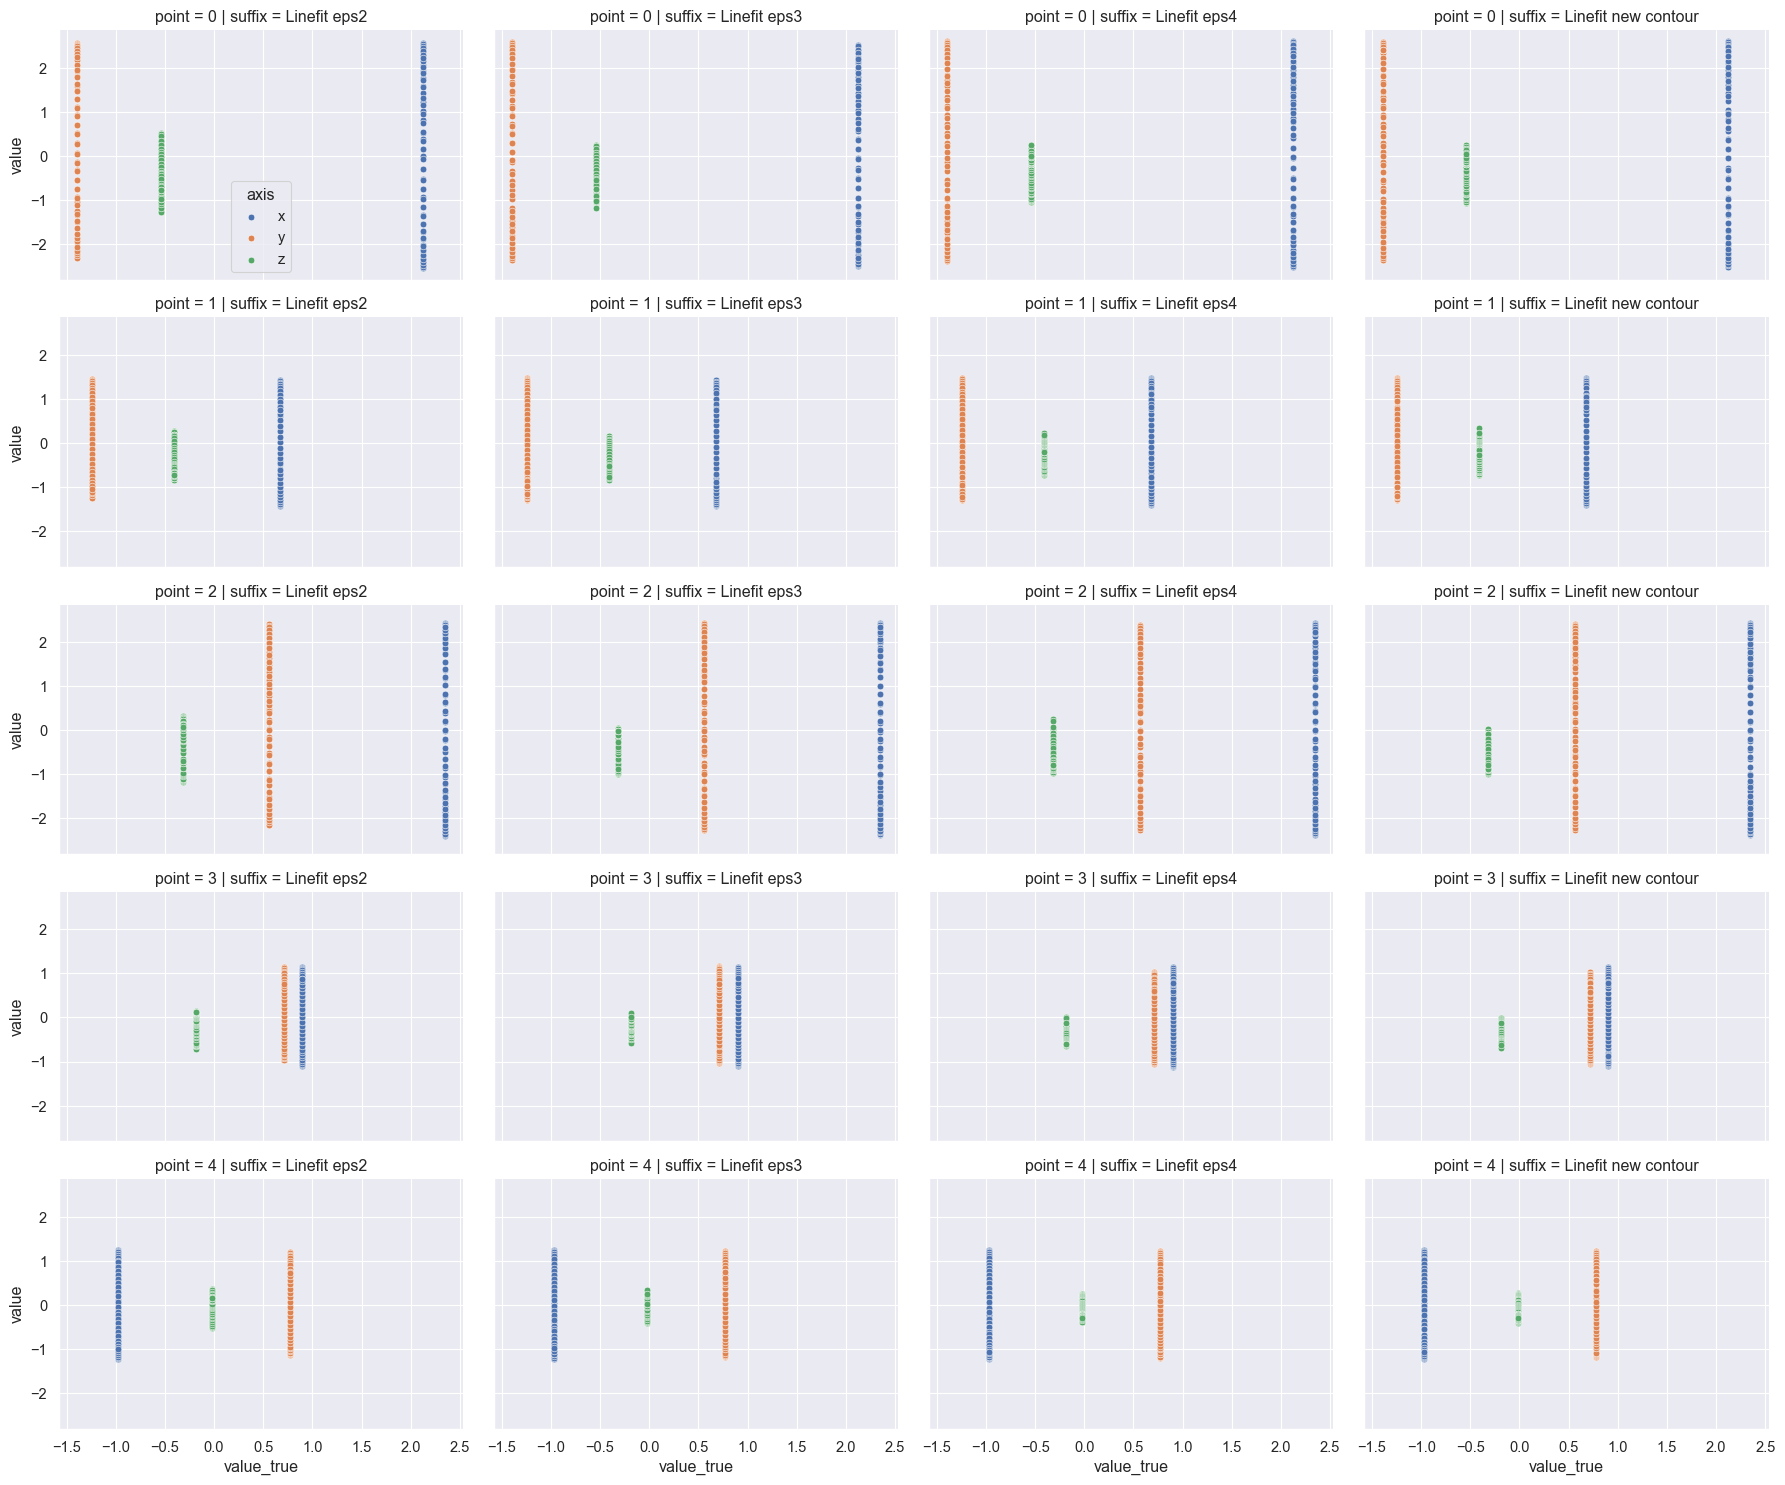

In [680]:
g = sns.FacetGrid(df_dist_predict, col="suffix", row="point", hue="axis", sharex=True, sharey=True, height=3,
                  aspect=1.5, legend_out=False)
g.map(sns.scatterplot, "value_true", "value")
g.add_legend()


In [ ]:
sns.lmplot(data=df_dist_predict, x='value_true', y='value', hue='axis', col='suffix', row='point', sharex=True,
           sharey=True, height=3, aspect=1.5, legend=False)

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


In [ ]:
for i, point in enumerate(three_d_points):
    df_real[[str(i) + 'x_real', str(i) + 'y_real', str(i) + 'z_real']] = df_real.apply(
        lambda row: get_rotated_point(row['correct_roll'], row['correct_pitch'], row['correct_yaw']), axis=1,
        result_type='expand')
    for suffix in suffixes:
        df[[str(i) + 'x_calculated' + suffix, str(i) + 'y_calculated' + suffix,
            str(i) + 'z_calculated' + suffix]] = df.apply(
            lambda row: get_rotated_point(row['roll' + suffix], row['pitch' + suffix], row['yaw' + suffix], point),
            axis=1,
            result_type='expand')

df = df.merge(df_real, left_index=True, right_index=True)

In [ ]:
# x, y, z, x_true, y_true, z_true, suffix as columns from df
for i, point in enumerate(three_d_points):
    df_real[[str(i) + 'x_real', str(i) + 'y_real', str(i) + 'z_real']] = df_real.apply(
        lambda row: get_rotated_point(row['correct_roll'], row['correct_pitch'], row['correct_yaw']), axis=1,
        result_type='expand')
    for suffix in suffixes:
        df[[str(i) + 'x_calculated' + suffix, str(i) + 'y_calculated' + suffix,
            str(i) + 'z_calculated' + suffix]] = df.apply(
            lambda row: get_rotated_point(row['roll' + suffix], row['pitch' + suffix], row['yaw' + suffix], point),
            axis=1,
            result_type='expand')

In [ ]:
# make 3d plot of calculated points
for i in range(0, 1):
    for suffix, color in zip(suffixes, colors):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        # ax.view_init(azim=-90, elev=-90)
        ax.scatter3D(df[str(i) + 'x_calculated' + suffix], df[str(i) + 'y_calculated' + suffix],
                     df[str(i) + 'z_calculated' + suffix],
                     color=color);
        # first and last point in black

        ax.scatter3D(df[str(i) + 'x_calculated' + suffix].iloc[0], df[str(i) + 'y_calculated' + suffix].iloc[0],
                     df[str(i) + 'z_calculated' + suffix].iloc[0], color="black");
        # ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
        #              df['z_calculated' + suffix].iloc[-1], color="black");

        ax.scatter3D(df_real[str(i) + 'x_real'], df_real[str(i) + 'y_real'], df_real[str(i) + 'z_real'], color="black");
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('calculated ' + suffix + " point " + str(i))
        plt.show()

In [ ]:
# make 3d plot of calculated points
for suffix, color in zip(suffixes, colors):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # ax.view_init(azim=-90, elev=-90)
    ax.scatter3D(df['x_calculated' + suffix], df['y_calculated' + suffix], df['z_calculated' + suffix], color=color);
    # first and last point in black
    ax.scatter3D(df['x_calculated' + suffix].iloc[0], df['y_calculated' + suffix].iloc[0],
                 df['z_calculated' + suffix].iloc[0], color="black");
    ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
                 df['z_calculated' + suffix].iloc[-1], color="black");

    ax.scatter3D(df_real['x_real'], df_real['y_real'], df_real['z_real'], color="black");
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('calculated ' + suffix)
    plt.show()

In [ ]:
# make residual plot from real x and x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.residplot(ax=axes[0], data=df, x='x_real', y='x_calculated' + suffix, color=color);
    sns.residplot(ax=axes[1], data=df, x='y_real', y='y_calculated' + suffix, color=color);
    sns.residplot(ax=axes[2], data=df, x='z_real', y='z_calculated' + suffix, color=color);

In [ ]:
def get_distance(x1, y1, z1, x2, y2, z2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)


for i, point in enumerate(three_d_points):
    for suffix in suffixes:
        df[str(i) + 'distance' + suffix] = df.apply(
            lambda row: get_distance(row[str(i) + 'x_calculated' + suffix], row[str(i) + 'y_calculated' + suffix],
                                     row[str(i) + 'z_calculated' + suffix],
                                     row[str(i) + 'x_real'], row[str(i) + 'y_real'], row[str(i) + 'z_real']), axis=1)


In [ ]:
print("Mean distance to real point")
for i, point in enumerate(three_d_points):
    print("Point " + str(i))
    for suffix in suffixes:
        print(suffix + ": " + str(df[str(i) + 'distance' + suffix].mean()))

In [ ]:
df

In [ ]:
# plot distance to real point
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);



In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='pitch' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='yaw' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='roll' + suffix, color=color);
# axes[0].set_yticks(range(0, 361, 45));
# sns.scatterplot(ax=axes[1], data=df, x='img_number_x', y='yaw_x', hue='loss_x');
# sns.scatterplot(ax=axes[1], data=df, x='img_number_y', y='yaw_y', hue='loss_y', alpha=0.5);
# # axes[1].set_yticks(range(-90, 91, 45));
# sns.scatterplot(ax=axes[2], data=df, x='img_number_x', y='roll_x', hue='loss_x');
# sns.scatterplot(ax=axes[2], data=df, x='img_number_y', y='roll_y', hue='loss_y', alpha=0.5);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))
# axes[2].set_yticks(range(0, 361, 45));

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='x' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='y' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='z' + suffix, color=color);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))

In [ ]:
df

In [ ]:
#flatten list
plots = sorted([item for sublist in [['x' + s, 'y' + s, 'z' + s] for s in suffixes] for item in sublist])
df[plots].describe()


In [ ]:
df[sorted([item for sublist in [['iterations' + s, 'loss' + s] for s in suffixes] for item in sublist])].describe()

In [ ]:
# plot roll, pitch, yaw in 3d
ax = plt.axes(projection='3d')
ax.scatter3D(df['roll'], df['pitch'], df['yaw'], c=df['loss'], cmap='Greens');
ax.scatter3D(df['correct_roll'], df['correct_pitch'], df['correct_yaw'], color='red', alpha=0.5);
ax.set_xlabel('roll')
ax.set_ylabel('pitch')
ax.set_zlabel('yaw')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='correct_roll', y='roll', hue='loss')

In [ ]:
df['roll_diff'] = df['og_correct_roll'] - df['og_roll']
sns.scatterplot(data=df[abs(df['roll_diff']) > 4], x='img_number', y='roll_diff', hue='roll_diff')

In [ ]:
# make residual plot from real roll and roll
sns.residplot(data=df, x='og_correct_roll', y='og_roll');

In [ ]:
ax = sns.regplot(data=df, x='correct_roll', y='roll');

In [ ]:
# df['rounded_loss'] to nearest 1 decimal place
df['rounded_loss'] = df['loss'].apply(lambda x: round(x, 0))

In [ ]:
sns.lmplot(data=df[df['rounded_loss'] > 1], x='og_real_roll', y='og_roll');

In [ ]:
sns.scatterplot(data=df[df['rounded_loss'] > 3], y='og_roll', x='img_number');

In [ ]:
sns.scatterplot(data=df, y='loss', x='iterations');

In [ ]:
suffixes = ['_3eps', '_2eps', '_linefit', '_linefit_new_contour']
colors = ['red', 'green', 'blue', 'orange']

for i, point in enumerate(three_d_points):
    df_real[[str(i) + 'x_real', str(i) + 'y_real', str(i) + 'z_real']] = df_real.apply(
        lambda row: get_rotated_point(row['correct_roll'], row['correct_pitch'], row['correct_yaw']), axis=1,
        result_type='expand')
    for suffix in suffixes:
        df[[str(i) + 'x_calculated' + suffix, str(i) + 'y_calculated' + suffix,
            str(i) + 'z_calculated' + suffix]] = df.apply(
            lambda row: get_rotated_point(row['roll' + suffix], row['pitch' + suffix], row['yaw' + suffix], point),
            axis=1,
            result_type='expand')

df = df.merge(df_real, left_index=True, right_index=True)

In [ ]:
df[['iterations_linefit_new_contour', 'loss_linefit_new_contour']].describe()

In [ ]:
# make 3d plot of calculated points
for i in range(0, 1):
    for suffix, color in zip(suffixes, colors):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        # ax.view_init(azim=-90, elev=-90)
        ax.scatter3D(df[str(i) + 'x_calculated' + suffix], df[str(i) + 'y_calculated' + suffix],
                     df[str(i) + 'z_calculated' + suffix],
                     color=color);
        # first and last point in black
        # ax.scatter3D(df['x_calculated' + suffix].iloc[0], df['y_calculated' + suffix].iloc[0],
        #              df['z_calculated' + suffix].iloc[0], color="black");
        # ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
        #              df['z_calculated' + suffix].iloc[-1], color="black");

        ax.scatter3D(df_real[str(i) + 'x_real'], df_real[str(i) + 'y_real'], df_real[str(i) + 'z_real'], color="black");
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('calculated ' + suffix + " point " + str(i))
        plt.show()

In [ ]:
# make 3d plot of calculated points
for suffix, color in zip(suffixes, colors):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # ax.view_init(azim=-90, elev=-90)
    ax.scatter3D(df['x_calculated' + suffix], df['y_calculated' + suffix], df['z_calculated' + suffix], color=color);
    # first and last point in black
    ax.scatter3D(df['x_calculated' + suffix].iloc[0], df['y_calculated' + suffix].iloc[0],
                 df['z_calculated' + suffix].iloc[0], color="black");
    ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
                 df['z_calculated' + suffix].iloc[-1], color="black");

    ax.scatter3D(df_real['x_real'], df_real['y_real'], df_real['z_real'], color="black");
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('calculated ' + suffix)
    plt.show()

In [ ]:
# make residual plot from real x and x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.residplot(ax=axes[0], data=df, x='x_real', y='x_calculated' + suffix, color=color);
    sns.residplot(ax=axes[1], data=df, x='y_real', y='y_calculated' + suffix, color=color);
    sns.residplot(ax=axes[2], data=df, x='z_real', y='z_calculated' + suffix, color=color);

In [ ]:
def get_distance(x1, y1, z1, x2, y2, z2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)


for i, point in enumerate(three_d_points):
    for suffix in suffixes:
        df[str(i) + 'distance' + suffix] = df.apply(
            lambda row: get_distance(row[str(i) + 'x_calculated' + suffix], row[str(i) + 'y_calculated' + suffix],
                                     row[str(i) + 'z_calculated' + suffix],
                                     row[str(i) + 'x_real'], row[str(i) + 'y_real'], row[str(i) + 'z_real']), axis=1)


In [ ]:
print("Mean distance to real point")
for i, point in enumerate(three_d_points):
    print("Point " + str(i))
    for suffix in suffixes:
        print(suffix + ": " + str(df[str(i) + 'distance' + suffix].mean()))

In [ ]:
df

In [ ]:
# plot distance to real point
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);



In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='pitch' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='yaw' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='roll' + suffix, color=color);
# axes[0].set_yticks(range(0, 361, 45));
# sns.scatterplot(ax=axes[1], data=df, x='img_number_x', y='yaw_x', hue='loss_x');
# sns.scatterplot(ax=axes[1], data=df, x='img_number_y', y='yaw_y', hue='loss_y', alpha=0.5);
# # axes[1].set_yticks(range(-90, 91, 45));
# sns.scatterplot(ax=axes[2], data=df, x='img_number_x', y='roll_x', hue='loss_x');
# sns.scatterplot(ax=axes[2], data=df, x='img_number_y', y='roll_y', hue='loss_y', alpha=0.5);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))
# axes[2].set_yticks(range(0, 361, 45));

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='x' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='y' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='z' + suffix, color=color);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))

In [ ]:
df

In [ ]:
#flatten list
plots = sorted([item for sublist in [['x' + s, 'y' + s, 'z' + s] for s in suffixes] for item in sublist])
df[plots].describe()


In [ ]:
df[sorted([item for sublist in [['iterations' + s, 'loss' + s] for s in suffixes] for item in sublist])].describe()

In [ ]:
# plot roll, pitch, yaw in 3d
ax = plt.axes(projection='3d')
ax.scatter3D(df['roll'], df['pitch'], df['yaw'], c=df['loss'], cmap='Greens');
ax.scatter3D(df['correct_roll'], df['correct_pitch'], df['correct_yaw'], color='red', alpha=0.5);
ax.set_xlabel('roll')
ax.set_ylabel('pitch')
ax.set_zlabel('yaw')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='correct_roll', y='roll', hue='loss')

In [ ]:
df['roll_diff'] = df['og_correct_roll'] - df['og_roll']
sns.scatterplot(data=df[abs(df['roll_diff']) > 4], x='img_number', y='roll_diff', hue='roll_diff')

In [ ]:
# make residual plot from real roll and roll
sns.residplot(data=df, x='og_correct_roll', y='og_roll');

In [ ]:
ax = sns.regplot(data=df, x='correct_roll', y='roll');

In [ ]:
# df['rounded_loss'] to nearest 1 decimal place
df['rounded_loss'] = df['loss'].apply(lambda x: round(x, 0))

In [ ]:
sns.lmplot(data=df[df['rounded_loss'] > 1], x='og_real_roll', y='og_roll');

In [ ]:
sns.scatterplot(data=df[df['rounded_loss'] > 3], y='og_roll', x='img_number');

In [ ]:
sns.scatterplot(data=df, y='loss', x='iterations');

In [ ]:
# make 3d plot of calculated points
for i in range(0, 1):
    for suffix, color in zip(suffixes, colors):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        # ax.view_init(azim=-90, elev=-90)
        ax.scatter3D(df[str(i) + 'x_calculated' + suffix], df[str(i) + 'y_calculated' + suffix],
                     df[str(i) + 'z_calculated' + suffix],
                     color=color);
        # first and last point in black
        # ax.scatter3D(df['x_calculated' + suffix].iloc[0], df['y_calculated' + suffix].iloc[0],
        #              df['z_calculated' + suffix].iloc[0], color="black");
        # ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
        #              df['z_calculated' + suffix].iloc[-1], color="black");

        ax.scatter3D(df_real[str(i) + 'x_real'], df_real[str(i) + 'y_real'], df_real[str(i) + 'z_real'], color="black");
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('calculated ' + suffix + " point " + str(i))
        plt.show()

In [ ]:
# make 3d plot of calculated points
for suffix, color in zip(suffixes, colors):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # ax.view_init(azim=-90, elev=-90)
    ax.scatter3D(df['x_calculated' + suffix], df['y_calculated' + suffix], df['z_calculated' + suffix], color=color);
    # first and last point in black
    ax.scatter3D(df['x_calculated' + suffix].iloc[0], df['y_calculated' + suffix].iloc[0],
                 df['z_calculated' + suffix].iloc[0], color="black");
    ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
                 df['z_calculated' + suffix].iloc[-1], color="black");

    ax.scatter3D(df_real['x_real'], df_real['y_real'], df_real['z_real'], color="black");
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('calculated ' + suffix)
    plt.show()

In [ ]:
# make residual plot from real x and x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.residplot(ax=axes[0], data=df, x='x_real', y='x_calculated' + suffix, color=color);
    sns.residplot(ax=axes[1], data=df, x='y_real', y='y_calculated' + suffix, color=color);
    sns.residplot(ax=axes[2], data=df, x='z_real', y='z_calculated' + suffix, color=color);

In [ ]:
def get_distance(x1, y1, z1, x2, y2, z2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)


for i, point in enumerate(three_d_points):
    for suffix in suffixes:
        df[str(i) + 'distance' + suffix] = df.apply(
            lambda row: get_distance(row[str(i) + 'x_calculated' + suffix], row[str(i) + 'y_calculated' + suffix],
                                     row[str(i) + 'z_calculated' + suffix],
                                     row[str(i) + 'x_real'], row[str(i) + 'y_real'], row[str(i) + 'z_real']), axis=1)


In [ ]:
print("Mean distance to real point")
for i, point in enumerate(three_d_points):
    print("Point " + str(i))
    for suffix in suffixes:
        print(suffix + ": " + str(df[str(i) + 'distance' + suffix].mean()))

In [ ]:
df

In [ ]:
# plot distance to real point
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);



In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='pitch' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='yaw' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='roll' + suffix, color=color);
# axes[0].set_yticks(range(0, 361, 45));
# sns.scatterplot(ax=axes[1], data=df, x='img_number_x', y='yaw_x', hue='loss_x');
# sns.scatterplot(ax=axes[1], data=df, x='img_number_y', y='yaw_y', hue='loss_y', alpha=0.5);
# # axes[1].set_yticks(range(-90, 91, 45));
# sns.scatterplot(ax=axes[2], data=df, x='img_number_x', y='roll_x', hue='loss_x');
# sns.scatterplot(ax=axes[2], data=df, x='img_number_y', y='roll_y', hue='loss_y', alpha=0.5);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))
# axes[2].set_yticks(range(0, 361, 45));

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='x' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='y' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='z' + suffix, color=color);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))

In [ ]:
df

In [ ]:
#flatten list
plots = sorted([item for sublist in [['x' + s, 'y' + s, 'z' + s] for s in suffixes] for item in sublist])
df[plots].describe()


In [ ]:
df[sorted([item for sublist in [['iterations' + s, 'loss' + s] for s in suffixes] for item in sublist])].describe()

In [ ]:
# plot roll, pitch, yaw in 3d
ax = plt.axes(projection='3d')
ax.scatter3D(df['roll'], df['pitch'], df['yaw'], c=df['loss'], cmap='Greens');
ax.scatter3D(df['correct_roll'], df['correct_pitch'], df['correct_yaw'], color='red', alpha=0.5);
ax.set_xlabel('roll')
ax.set_ylabel('pitch')
ax.set_zlabel('yaw')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='correct_roll', y='roll', hue='loss')

In [ ]:
df['roll_diff'] = df['og_correct_roll'] - df['og_roll']
sns.scatterplot(data=df[abs(df['roll_diff']) > 4], x='img_number', y='roll_diff', hue='roll_diff')

In [ ]:
# make residual plot from real roll and roll
sns.residplot(data=df, x='og_correct_roll', y='og_roll');

In [ ]:
ax = sns.regplot(data=df, x='correct_roll', y='roll');

In [ ]:
# df['rounded_loss'] to nearest 1 decimal place
df['rounded_loss'] = df['loss'].apply(lambda x: round(x, 0))

In [ ]:
sns.lmplot(data=df[df['rounded_loss'] > 1], x='og_real_roll', y='og_roll');

In [ ]:
sns.scatterplot(data=df[df['rounded_loss'] > 3], y='og_roll', x='img_number');

In [ ]:
sns.scatterplot(data=df, y='loss', x='iterations');

In [ ]:
suffixes = ['_3eps', '_2eps', '_linefit', '_linefit_new_contour']
colors = ['red', 'green', 'blue', 'orange']

for i, point in enumerate(three_d_points):
    df_real[[str(i) + 'x_real', str(i) + 'y_real', str(i) + 'z_real']] = df_real.apply(
        lambda row: get_rotated_point(row['correct_roll'], row['correct_pitch'], row['correct_yaw']), axis=1,
        result_type='expand')
    for suffix in suffixes:
        df[[str(i) + 'x_calculated' + suffix, str(i) + 'y_calculated' + suffix,
            str(i) + 'z_calculated' + suffix]] = df.apply(
            lambda row: get_rotated_point(row['roll' + suffix], row['pitch' + suffix], row['yaw' + suffix], point),
            axis=1,
            result_type='expand')

df = df.merge(df_real, left_index=True, right_index=True)

In [ ]:
df[['iterations_linefit_new_contour', 'loss_linefit_new_contour']].describe()

In [ ]:
# make 3d plot of calculated points
for i in range(0, 1):
    for suffix, color in zip(suffixes, colors):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        # ax.view_init(azim=-90, elev=-90)
        ax.scatter3D(df[str(i) + 'x_calculated' + suffix], df[str(i) + 'y_calculated' + suffix],
                     df[str(i) + 'z_calculated' + suffix],
                     color=color);
        # first and last point in black
        # ax.scatter3D(df['x_calculated' + suffix].iloc[0], df['y_calculated' + suffix].iloc[0],
        #              df['z_calculated' + suffix].iloc[0], color="black");
        # ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
        #              df['z_calculated' + suffix].iloc[-1], color="black");

        ax.scatter3D(df_real[str(i) + 'x_real'], df_real[str(i) + 'y_real'], df_real[str(i) + 'z_real'], color="black");
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('calculated ' + suffix + " point " + str(i))
        plt.show()

In [ ]:
# make 3d plot of calculated points
for suffix, color in zip(suffixes, colors):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # ax.view_init(azim=-90, elev=-90)
    ax.scatter3D(df['x_calculated' + suffix], df['y_calculated' + suffix], df['z_calculated' + suffix], color=color);
    # first and last point in black
    ax.scatter3D(df['x_calculated' + suffix].iloc[0], df['y_calculated' + suffix].iloc[0],
                 df['z_calculated' + suffix].iloc[0], color="black");
    ax.scatter3D(df['x_calculated' + suffix].iloc[-1], df['y_calculated' + suffix].iloc[-1],
                 df['z_calculated' + suffix].iloc[-1], color="black");

    ax.scatter3D(df_real['x_real'], df_real['y_real'], df_real['z_real'], color="black");
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('calculated ' + suffix)
    plt.show()

In [ ]:
# make residual plot from real x and x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.residplot(ax=axes[0], data=df, x='x_real', y='x_calculated' + suffix, color=color);
    sns.residplot(ax=axes[1], data=df, x='y_real', y='y_calculated' + suffix, color=color);
    sns.residplot(ax=axes[2], data=df, x='z_real', y='z_calculated' + suffix, color=color);

In [ ]:
def get_distance(x1, y1, z1, x2, y2, z2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)


for i, point in enumerate(three_d_points):
    for suffix in suffixes:
        df[str(i) + 'distance' + suffix] = df.apply(
            lambda row: get_distance(row[str(i) + 'x_calculated' + suffix], row[str(i) + 'y_calculated' + suffix],
                                     row[str(i) + 'z_calculated' + suffix],
                                     row[str(i) + 'x_real'], row[str(i) + 'y_real'], row[str(i) + 'z_real']), axis=1)


In [ ]:
print("Mean distance to real point")
for i, point in enumerate(three_d_points):
    print("Point " + str(i))
    for suffix in suffixes:
        print(suffix + ": " + str(df[str(i) + 'distance' + suffix].mean()))

In [ ]:
df

In [ ]:
# plot distance to real point
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='distance' + suffix, color=color);



In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='pitch' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='yaw' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='roll' + suffix, color=color);
# axes[0].set_yticks(range(0, 361, 45));
# sns.scatterplot(ax=axes[1], data=df, x='img_number_x', y='yaw_x', hue='loss_x');
# sns.scatterplot(ax=axes[1], data=df, x='img_number_y', y='yaw_y', hue='loss_y', alpha=0.5);
# # axes[1].set_yticks(range(-90, 91, 45));
# sns.scatterplot(ax=axes[2], data=df, x='img_number_x', y='roll_x', hue='loss_x');
# sns.scatterplot(ax=axes[2], data=df, x='img_number_y', y='roll_y', hue='loss_y', alpha=0.5);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))
# axes[2].set_yticks(range(0, 361, 45));

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for suffix, color in zip(suffixes, colors):
    sns.scatterplot(ax=axes[0], data=df, x='img_number' + suffix, y='x' + suffix, color=color);
    sns.scatterplot(ax=axes[1], data=df, x='img_number' + suffix, y='y' + suffix, color=color);
    sns.scatterplot(ax=axes[2], data=df, x='img_number' + suffix, y='z' + suffix, color=color);

nice_names = [s.replace('_', ' ') for s in suffixes]
fig.legend(labels=nice_names, loc='center right', bbox_to_anchor=(1, 0.5))

In [ ]:
df

In [ ]:
#flatten list
plots = sorted([item for sublist in [['x' + s, 'y' + s, 'z' + s] for s in suffixes] for item in sublist])
df[plots].describe()


In [ ]:
df[sorted([item for sublist in [['iterations' + s, 'loss' + s] for s in suffixes] for item in sublist])].describe()

In [ ]:
# plot roll, pitch, yaw in 3d
ax = plt.axes(projection='3d')
ax.scatter3D(df['roll'], df['pitch'], df['yaw'], c=df['loss'], cmap='Greens');
ax.scatter3D(df['correct_roll'], df['correct_pitch'], df['correct_yaw'], color='red', alpha=0.5);
ax.set_xlabel('roll')
ax.set_ylabel('pitch')
ax.set_zlabel('yaw')
plt.show()

In [ ]:
sns.scatterplot(data=df, x='correct_roll', y='roll', hue='loss')

In [ ]:
df['roll_diff'] = df['og_correct_roll'] - df['og_roll']
sns.scatterplot(data=df[abs(df['roll_diff']) > 4], x='img_number', y='roll_diff', hue='roll_diff')

In [ ]:
# make residual plot from real roll and roll
sns.residplot(data=df, x='og_correct_roll', y='og_roll');

In [ ]:
ax = sns.regplot(data=df, x='correct_roll', y='roll');

In [ ]:
# df['rounded_loss'] to nearest 1 decimal place
df['rounded_loss'] = df['loss'].apply(lambda x: round(x, 0))

In [ ]:
sns.lmplot(data=df[df['rounded_loss'] > 1], x='og_real_roll', y='og_roll');

In [ ]:
sns.scatterplot(data=df[df['rounded_loss'] > 3], y='og_roll', x='img_number');

In [ ]:
sns.scatterplot(data=df, y='loss', x='iterations');
